# Creating a Julia set in Python

In [4]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [60]:
import matplotlib.pyplot as plt

/home/przemyslaw/projects/shared-venv/lib/python3.11/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [5]:
z = 3 + 4j

In [6]:
abs(z)

5.0

In [25]:
x = 1
y = 3
x + y*1j
complex(x, y)

(1+3j)

In [34]:
def create_grid(re_start: float = -1.8, re_end: float = 1.8, im_start: float = -1.8, im_end: float = 1.8, width: int = 30):
    delta_re = (re_end - re_start) / width
    delta_im = (im_end - im_start) / width
    zs = list()
    im = im_start
    while im <= im_end:
        row = list()
        real = re_start
        while real < re_end:
            row.append(complex(real, im))
            real += delta_re
        zs.append(row)
        im += delta_im
    return zs

In [37]:
width = 30
grid = create_grid(width=width)
assert len(grid) == width and len(grid[0]) == width

In [40]:
def calculate_julia(z: complex, c: complex, max_iter: int = 300):
    n = 0
    while abs(z) < 2 and n < max_iter:
        n += 1
        z = z*z + c
    return n

In [67]:
c: complex = -0.62772 - 0.42193j
c = 0 + 0j
calculate_julia(0.1+0.5j, c=c)

300

In [68]:
def calculate_julia_set(max_iter: int, width: int = 100, c: complex = -0.62772 - 0.42193j):
    grid = create_grid(width=width)
    output = [[None for _ in row] for row in grid]
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            z = grid[i][j]
            output[i][j] = calculate_julia(z, c, max_iter=max_iter)
    return output

In [69]:
%%time
julia_set = calculate_julia_set(300, 1000)

CPU times: user 4.22 s, sys: 31.2 ms, total: 4.25 s
Wall time: 4.91 s


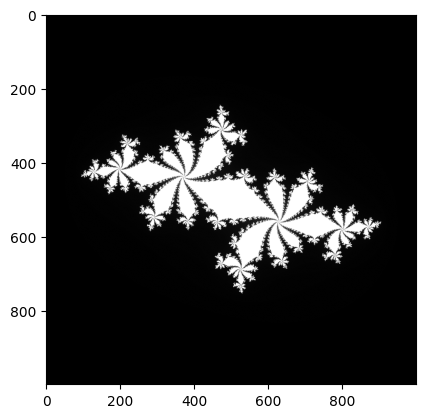

In [70]:
plt.imshow(julia_set, cmap='gray')